In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from fancyimpute import KNN

import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go

init_notebook_mode(connected=True)

train_path = "res/amazonReviews.800.train.csv"
test_path = "res/amazonReviews.700.test.csv"
result_folder = "results/"

test_set_ratio = 0.1 

In [4]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_train.head(10)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,545,5,4,3,2,2,3,1,1,2,...,0,0,0,0,0,0,0,1,0,Engineer
1,800,14,3,2,5,1,1,1,5,0,...,0,0,1,0,0,0,1,1,0,Kolln
2,1390,14,7,4,4,3,3,4,5,2,...,0,0,0,0,0,0,1,0,0,Vernon
3,1161,23,10,7,9,8,1,7,3,1,...,0,0,0,0,0,0,0,0,0,Nigam
4,23,13,3,3,6,1,5,0,3,3,...,0,0,0,0,1,0,0,1,0,Agresti
5,1386,11,16,7,9,9,6,0,2,2,...,0,0,0,0,0,0,1,0,0,Vernon
6,766,12,1,5,6,6,6,2,3,3,...,0,0,0,0,0,0,0,0,0,Koenig
7,1348,11,14,5,8,4,8,7,4,1,...,0,0,0,0,0,1,0,0,0,Sherwin
8,475,6,9,2,3,6,2,6,1,1,...,0,0,1,0,0,0,1,0,0,Cutey
9,132,1,2,6,0,0,0,8,1,2,...,0,0,0,0,0,0,0,0,0,Brody


### Initialize Training data

In [4]:
df_vars = df_train.loc[:, df_train.columns != 'Class']
df_class = df_train['Class']

X_train, X_test, y_train, y_test = train_test_split(df_vars, df_class, test_size=test_set_ratio, random_state=0)
#clf = DecisionTreeClassifier(min_samples_split=7, random_state=13221323)
clf = MLPClassifier(random_state=123093234)

### Simple cross validation for well-founded results

In [4]:
scores = cross_validate(clf, df_vars, df_class, cv=5)
scores['test_score']

# dt criterion=gini
# array([0.93854749, 0.9408284 , 0.93125   , 0.90728477, 0.96453901])

E:\Python\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
E:\Python\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.48883990073937794

### Hyper-parameter tuning

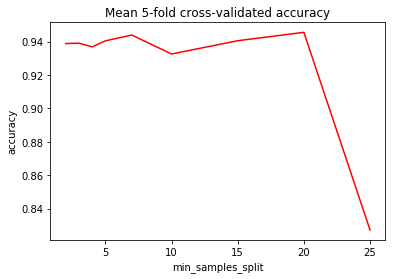

In [37]:
min_samples_splits = [2,3,4,5,7,10,15,20,25]
results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(clf, df_vars, df_class, cv=5)
    results.append(scores['test_score'].mean())
    
plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.title("Mean 5-fold cross-validated accuracy")
plt.show()

### Neat hyperparameter evaluation

E:\Python\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



0 --- 1e-05
[0.08379888 0.06508876 0.075      0.05298013 0.06382979]
1 --- 0.0001
[0.51955307 0.50295858 0.5625     0.53642384 0.54609929]
2 --- 0.001
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
3 --- 0.01
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
4 --- 0.1
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
5 --- 1
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
6 --- 10
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
7 --- 100
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
8 --- 1000
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]


E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



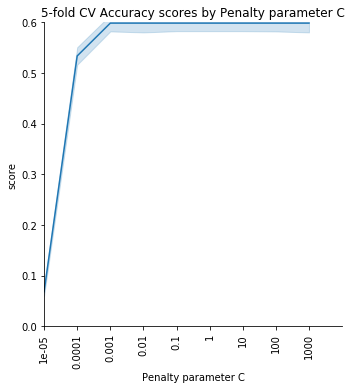

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_vars = preprocessing.scale(df_vars)
df_class = df_train['Class']

C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []
for idx, c in enumerate(C):
    print(idx, "---", c)
    clf = SVC(kernel="linear", C=c)
    scores = cross_validate(clf, df_vars, df_class, cv=5)['test_score']
    print(scores)
    for score in scores:
        results.append({'score': score, 'x':idx, 'penalty':c})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", data=df_trace)
plt.xticks(range(len(C)), C, rotation='vertical')
plt.xlabel("Penalty parameter C")
plt.title("5-fold CV Accuracy scores by Penalty parameter C")
axes = plt.gca()
axes.set_ylim([0.0,0.65])
axes.set_xlim([0,len(C)])
plt.savefig('scaled_amz_C_eval.pdf')
plt.show()

0 --- 2
Train [1. 1. 1. 1. 1.]
Test [0.37430168 0.33136095 0.40625    0.33774834 0.43262411]
1 --- 3
Train [0.93880837 0.93819334 0.9484375  0.94453005 0.94233687]
Test [0.34636872 0.36686391 0.3625     0.37086093 0.40425532]
2 --- 5
Train [0.8921095  0.8858954  0.9015625  0.88135593 0.88467375]
Test [0.36312849 0.36686391 0.39375    0.35761589 0.37588652]
3 --- 10
Train [0.79710145 0.79397781 0.8109375  0.78428351 0.81638847]
Test [0.3575419  0.35502959 0.4125     0.35761589 0.41134752]
4 --- 25
Train [0.6747182  0.65451664 0.6515625  0.62095532 0.68133536]
Test [0.36871508 0.37869822 0.3875     0.35761589 0.39007092]
5 --- 50
Train [0.568438   0.54833597 0.55625    0.52696456 0.53262519]
Test [0.34078212 0.34319527 0.375      0.33774834 0.40425532]
6 --- 100
Train [0.46698873 0.40095087 0.4140625  0.42526965 0.41274659]
Test [0.30726257 0.31360947 0.35       0.31125828 0.41134752]
7 --- 200
Train [0.30917874 0.34706815 0.3296875  0.32665639 0.30349014]
Test [0.25698324 0.27218935 0.3

E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



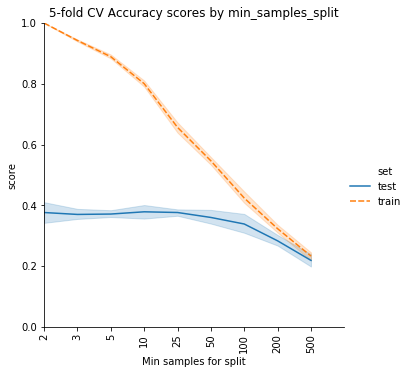

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']

params = [2,3,5,10,25,50,100,200,500]
results = []
for idx, c in enumerate(params):
    print(idx, "---", c)
    clf = DecisionTreeClassifier(min_samples_split=c, random_state=32143421)
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5, return_train_score=True)
    print("Train", scores['train_score'])
    print("Test", scores['test_score'])
    for score in scores['test_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'test'})
    for score in scores['train_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'train'})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", hue="set", style="set", data=df_trace)
plt.xticks(range(len(params)), params, rotation='vertical')
plt.xlabel("Min samples for split")
plt.title("5-fold CV Accuracy scores by min_samples_split")
axes = plt.gca()
axes.set_ylim([0.0,1])
axes.set_xlim([0,len(params)])
plt.savefig('amz_mss_eval.pdf')
plt.show()

In [14]:
df_trace

,penalty,score,set,x
0,2,0.374302,test,0
1,2,0.331361,test,0
2,2,0.406250,test,0
3,2,0.337748,test,0
4,2,0.432624,test,0
5,2,1.000000,train,0
6,2,1.000000,train,0
7,2,1.000000,train,0
8,2,1.000000,train,0
9,2,1.000000,train,0


E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



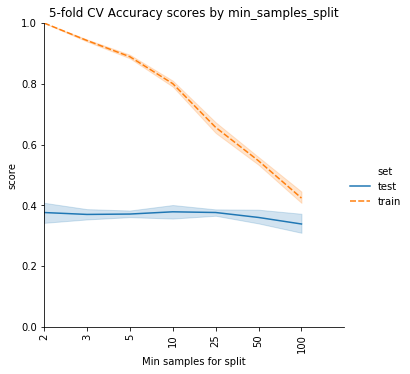

In [15]:
g = sns.relplot(x="x", y="score", kind="line", hue="set", style="set", data=df_trace)
plt.xticks(range(len(params)), params, rotation='vertical')
plt.xlabel("Min samples for split")
plt.title("5-fold CV Accuracy scores by min_samples_split")
axes = plt.gca()
axes.set_ylim([0.0,1.0])
axes.set_xlim([0,len(params)])
plt.savefig('amz_mss_eval.pdf')
plt.show()

### Scaled / Non-Scaled comparison

In [7]:
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_vars_scaled = preprocessing.scale(df_vars)
df_class = df_train['Class']

names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]

classifiers = [
    NearestCentroid(),
    SVC(kernel="linear"),
    DecisionTreeClassifier(),
    GaussianNB()]

for name, clf in zip(names, classifiers):
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5)['test_score']
    print(name, "Unscaled", scores.mean())
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars_scaled, df_class, cv=5)['test_score']
    print(name, "Scaled", scores.mean())

E:\Python\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



Nearest Centroid Unscaled 0.22794987191154314
Nearest Centroid Scaled 0.6083086395982383
Linear SVM Unscaled 0.5190677786666922
Linear SVM Scaled 0.5983495837320977
Decision Tree Unscaled 0.3849839828100602
Decision Tree Scaled 0.38356554309374813
Naive Bayes Unscaled 0.33543017279437287
Naive Bayes Scaled 0.4303194954995865


### Model fitting and sample testing

In [49]:
model = clf.fit(X_train, y_train)
model.score(X_test, y_test)

0.925

### Final prediction

In [50]:
df_res = pd.DataFrame()
df_res['ID'] = df_test['ID']
df_res['class'] = pd.Series(model.predict(df_test))
df_res.head(10)

,ID,class
0,656,Harp
1,949,Mark
2,255,CFH
3,21,Agresti
4,1412,Vision
5,278,Chachra
6,81,Auken
7,1475,Wilson
8,955,Mark
9,1400,Vernon


### Export

In [51]:
export_file_name = result_folder + "svm_linear.csv"
df_res.to_csv(export_file_name, index=False)

### Easy comparison

In [17]:
import traceback
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars_all = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']

#df_vars = KNN(k=3).fit_transform(df_vars)

names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]

classifiers = [
    NearestCentroid(),
    SVC(kernel="linear"),
    DecisionTreeClassifier(),
    GaussianNB()]

cl_scores = {}
for name in names:
    cl_scores[name] = []

for feature_count in [1,2,5,10,20,30,40,50,100,500,1000,10000]:#, 0]:
    if feature_count != 0:
        df_vars = SelectKBest(chi2, k=feature_count).fit_transform(df_vars_all, df_class)
    else:
        df_vars = df_vars_all
    print("-"*60)
    print("Feature count=", feature_count if feature_count > 0 else "ALL")
    for name, clf in zip(names, classifiers):
        try:
            np.random.seed(32143421)
            scores = cross_validate(clf, df_vars, df_class, cv=10, scoring='accuracy', return_train_score=True)
            cl_scores[name].append(scores)
            print(name,"-- Training Set --", "Mean", scores['train_score'].mean(), "-- Min", scores['train_score'].min(), "-- Max", scores['train_score'].max())
            print(name,"-- Test Set --", "Mean", scores['test_score'].mean(), "-- Min", scores['test_score'].min(), "-- Max", scores['test_score'].max())
        except:
            print("Classification failed for", name)
            traceback.print_exc()

------------------------------------------------------------
Feature count= 1
Nearest Centroid -- Training Set -- Mean 0.05100748222576227 -- Min 0.045205479452054796 -- Max 0.056100981767180924
Nearest Centroid -- Test Set -- Mean 0.054544975658874374 -- Min 0.010638297872340425 -- Max 0.10526315789473684
Linear SVM -- Training Set -- Mean 0.056544645664343564 -- Min 0.047685834502103785 -- Max 0.06970128022759602
Linear SVM -- Test Set -- Mean 0.045651151549367594 -- Min 0.02127659574468085 -- Max 0.06578947368421052
Decision Tree -- Training Set -- Mean 0.3956796609798045 -- Min 0.3847184986595174 -- Max 0.4051355206847361
Decision Tree -- Test Set -- Mean 0.04865355833776604 -- Min 0.0 -- Max 0.09523809523809523
Naive Bayes -- Training Set -- Mean 0.06868134300845222 -- Min 0.052781740370898715 -- Max 0.0740242261103634
Naive Bayes -- Test Set -- Mean 0.04646507347565488 -- Min 0.010638297872340425 -- Max 0.07766990291262135
---------------------------------------------------------

### all features
Nearest Centroid -- Training Set -- Mean 0.7496791822186778 -- Min 0.7279005524861878 -- Max 0.7724039829302988
Nearest Centroid -- Test Set -- Mean 0.6628582456264915 -- Min 0.5873015873015873 -- Max 0.7543859649122807
Linear SVM -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Linear SVM -- Test Set -- Mean 0.9560670435070409 -- Min 0.9191919191919192 -- Max 1.0
Decision Tree -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Decision Tree -- Test Set -- Mean 0.9458952341983844 -- Min 0.9 -- Max 1.0
Naive Bayes -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Naive Bayes -- Test Set -- Mean 0.35593122949313594 -- Min 0.2727272727272727 -- Max 0.42857142857142855

In [19]:
traces = []
for clf_name in names:
    traces.append(go.Box(
        y=cl_scores[clf_name]['test_score'],
        boxpoints='all',
        name=clf_name
    ))
    
layout = go.Layout(title="Accuracy on Test Set (Amazon Commerce Reviews)")
    
py.iplot(go.Figure(data=traces, layout=layout))

TypeError: list indices must be integers or slices, not str

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_vars.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
trace = []
names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]
feature_counts = [1,2,5,10,20,30,40,50,100,500,1000,10000]#, "All"]
for idx, feature_count in enumerate(feature_counts):
    for cl in names:
        for score in cl_scores[cl][idx]['test_score']:
            trace.append({'score': score, 'x':idx, 'name':feature_count, 'classifier':cl})
df_trace = pd.DataFrame.from_dict(trace)

E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



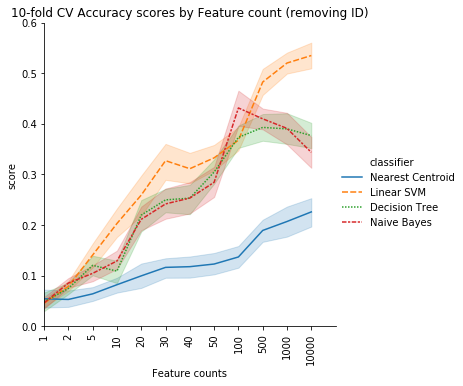

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.relplot(x="x", y="score", kind="line", hue="classifier", style="classifier", data=df_trace)
plt.xticks(range(len(feature_counts)), feature_counts, rotation='vertical')
plt.xlabel("Feature counts")
plt.title("10-fold CV Accuracy scores by Feature count (removing ID)")
axes = plt.gca()
axes.set_ylim([0.0,0.6])
axes.set_xlim([0,len(feature_counts)])
plt.savefig('feature_cnt_eval_wo_ID.pdf')
plt.show()

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
#df_vars_all = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']
selector = SelectKBest(chi2, k=1)
selector.fit(df_vars_all, df_class)
cols = selector.get_support(indices=True)
best_features = df_vars_all.columns[cols]
#df_vars = SelectKBest(chi2, k=1).fit_transform(df_vars_all, df_class)
best_features

Index(['ID'], dtype='object')

In [4]:
df_train.columns

Index(['ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V9992', 'V9993', 'V9994', 'V9995', 'V9996', 'V9997', 'V9998', 'V9999',
       'V10000', 'Class'],
      dtype='object', length=10002)

In [68]:
class_labels = sorted(df_train['Class'].unique(), key=lambda s: s.lower())
df_res = pd.DataFrame()
df_res['ID'] = df_test['ID']
df_res['class'] = df_test['ID'].apply(lambda x: class_labels[(x-1)//30])
df_res.head(10)

,ID,class
0,656,Harp
1,949,Mark
2,255,CFH
3,21,Agresti
4,1412,Vision
5,278,Chachra
6,81,Auken
7,1475,Wilson
8,955,Mark
9,1400,Vernon


In [69]:
export_file_name = result_folder + "id_prediction.csv"
df_res.to_csv(export_file_name, index=False)